# Multiclass Classification
- Iris Dataset
- https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset
- "The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant."

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_json('https://raw.githubusercontent.com/EunCheolChoi0123/COMM557Tutorial/refs/heads/main/Tutorial%209%20Supervised%20Learning%20(1)/iris.json')
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.describe()

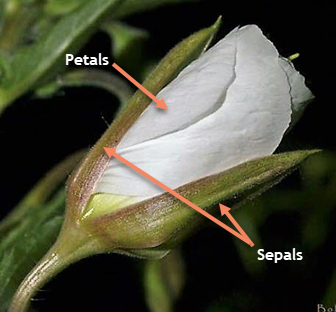

In [ ]:
from IPython import display
display.Image("https://plantid.net/Classic/Glossary/Sepal_files/image001.png")

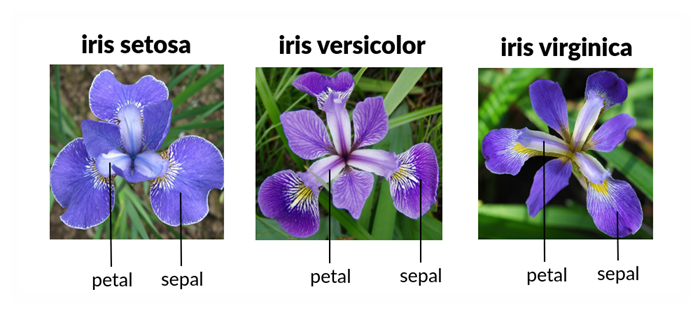

In [ ]:
# Image from
# https://medium.com/@Nivitus./iris-flower-classification-machine-learning-d4e337140fa4

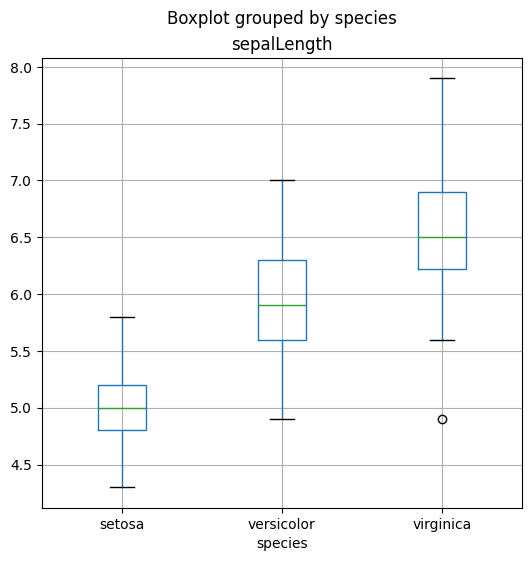

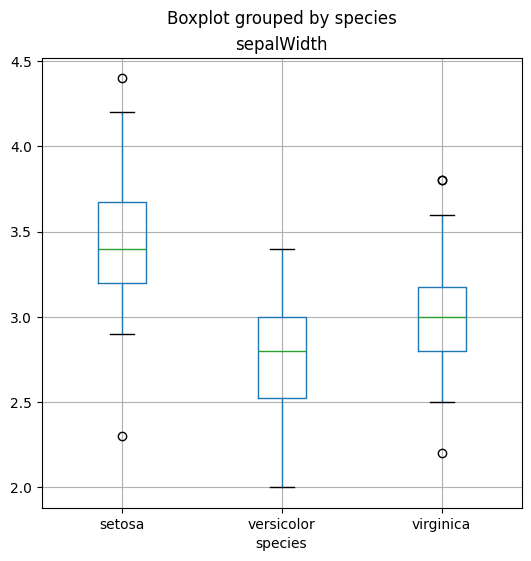

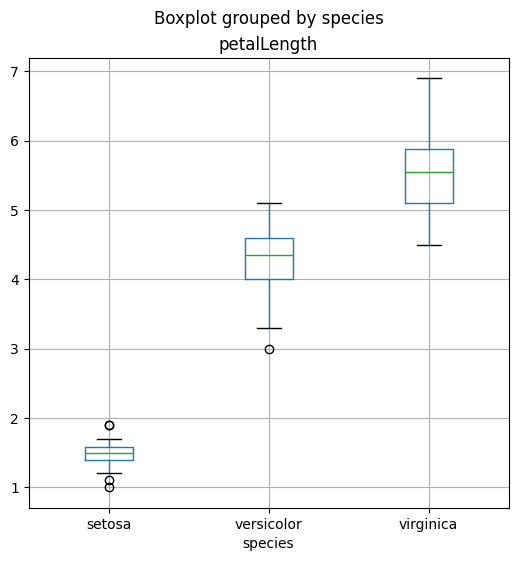

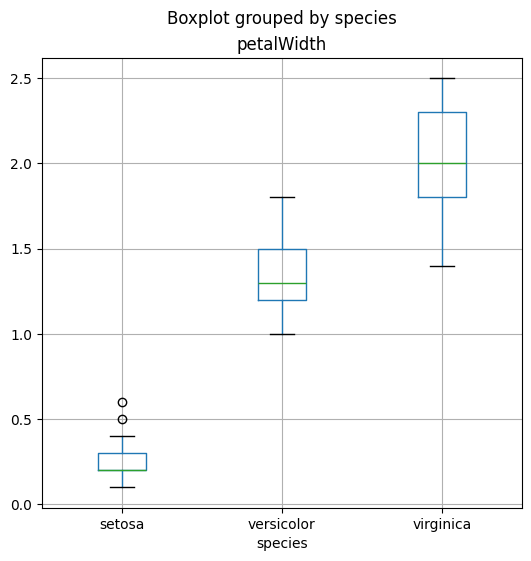

In [ ]:
# Boxplot for each features, separated by the outcome label
# Which features do you think explain diabetes better than others?

features = ['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']
for col in features:
    df.boxplot(column=col, by='species', figsize=(6,6))
    plt.title(col)
plt.show()

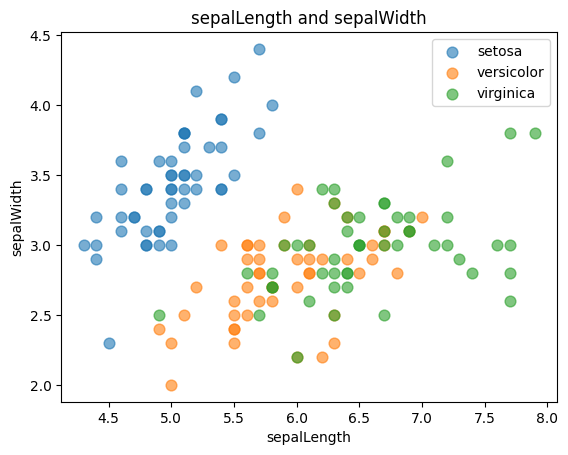

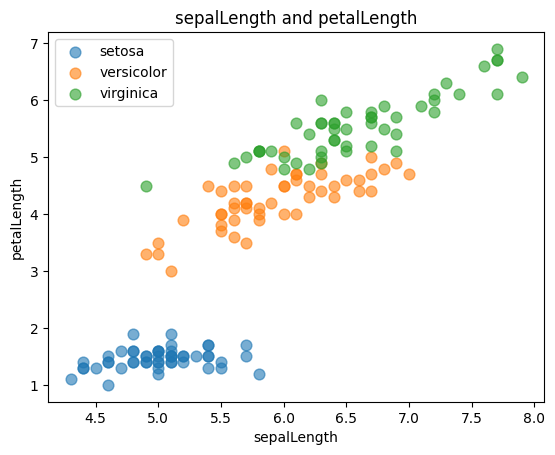

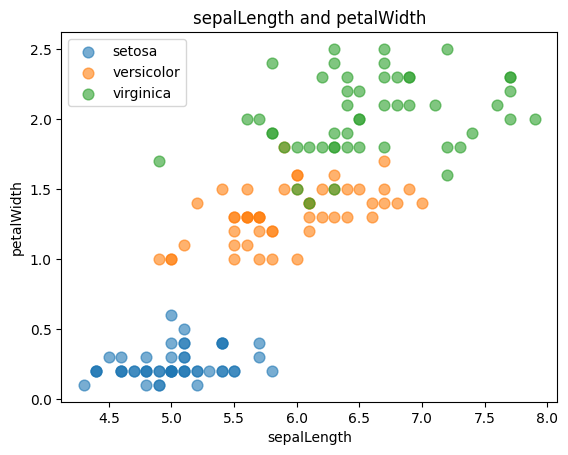

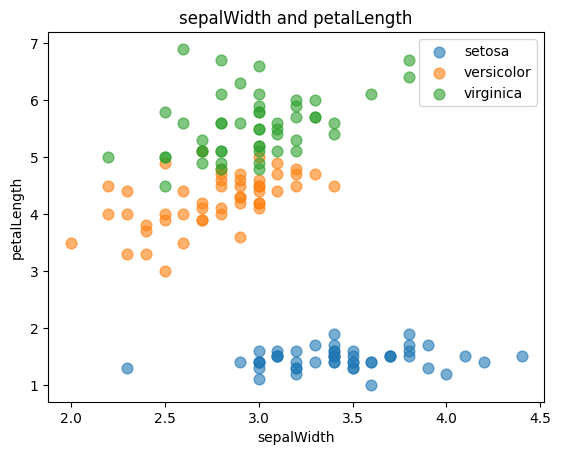

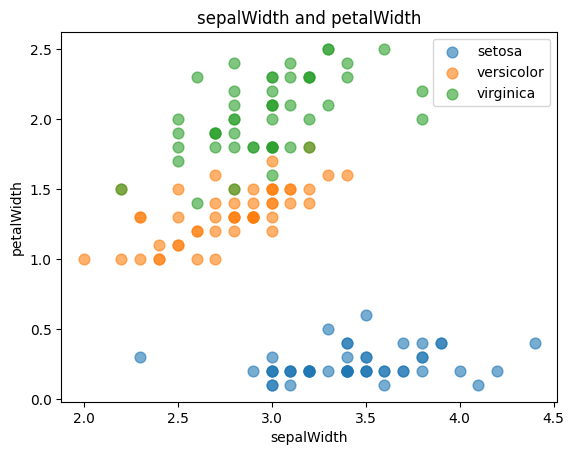

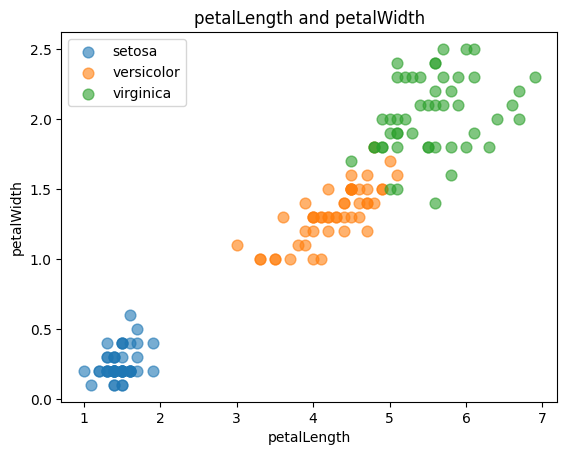

In [ ]:
# Scatterplot
# Let's visualize some pairs of variables that seems like to explain diebetes better
import itertools as it

def draw_scatter(df, x_feature, y_feature, label_col='Outcome', class_names=None):
    """
    Draws a scatter plot for two selected features colored by class label.

    Parameters:
        df (pd.DataFrame): dataset with features and labels
        x_feature (str): name of the feature on x-axis
        y_feature (str): name of the feature on y-axis
        label_col (str): name of the label column (default 'Outcome')
        class_names (dict): optional mapping {0: 'Non-Diabetic', 1: 'Diabetic'}
    """

    labels = df[label_col].values
    data = df[[x_feature, y_feature]].values
    unique_labels = sorted(df[label_col].unique())

    for label in unique_labels:
        idx = labels == label
        if class_names is not None:
            label_name = class_names.get(label, str(label))
        else:
            label_name = str(label)
        plt.scatter(data[idx, 0], data[idx, 1], alpha=0.6, s=60, label=label_name)

    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.legend()
    plt.title(f"{x_feature} and {y_feature}")
    plt.show()


# All feature names except the label
features = df.columns[:-1]

# Generate all possible pairs of features
feature_pairs = list(it.combinations(features, 2))

# Plot each pair
for x, y in feature_pairs:
    draw_scatter(df, x, y, label_col='species')

In [ ]:
# Instantiate Decision Tree classifier
from sklearn import neighbors, tree, cluster

clf = tree.DecisionTreeClassifier()

Accuracy: 0.9666666666666667
Precision (weighted): 0.9696969696969696
Recall (weighted): 0.9666666666666667
F1 Score (weighted): 0.9665831244778613

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



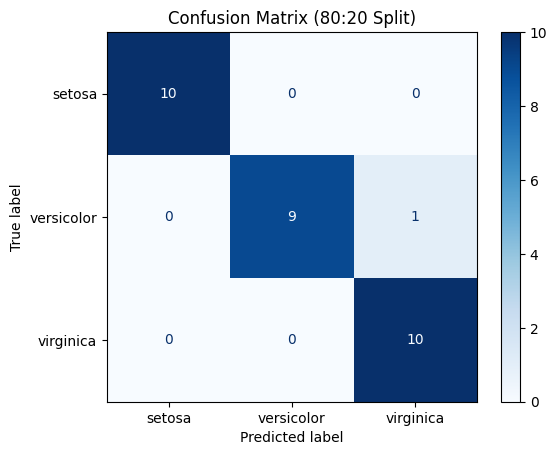

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Define features (X) and target (y)
X = df.drop(columns=['species']).values
y = df['species'].values

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train and predict
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Compute metrics (for multiclass)
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", acc)
print("Precision (weighted):", pre)
print("Recall (weighted):", rec)
print("F1 Score (weighted):", f1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
disp.ax_.set_title("Confusion Matrix (80:20 Split)")
plt.show()


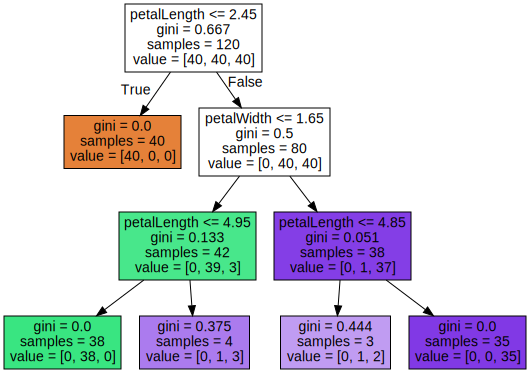

In [ ]:
import graphviz

# To visualize the tree using graphviz (you must have graphviz installed)
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=df.columns[:-1],  # replace with your feature names
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph.render("decision_tree")
graph


=== Fold 1 ===
TRAIN SAMPLE SIZE: 120
TEST SAMPLE SIZE: 30
Predicted:  ['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica']
Correct:    ['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica']
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accu

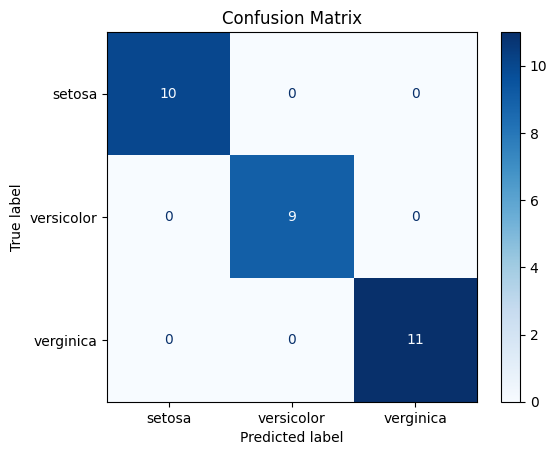


=== Fold 2 ===
TRAIN SAMPLE SIZE: 120
TEST SAMPLE SIZE: 30
Predicted:  ['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'virginica' 'virginica'
 'virginica' 'versicolor' 'virginica' 'virginica' 'virginica']
Correct:    ['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica']
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.86      0.92         7

    accuracy           

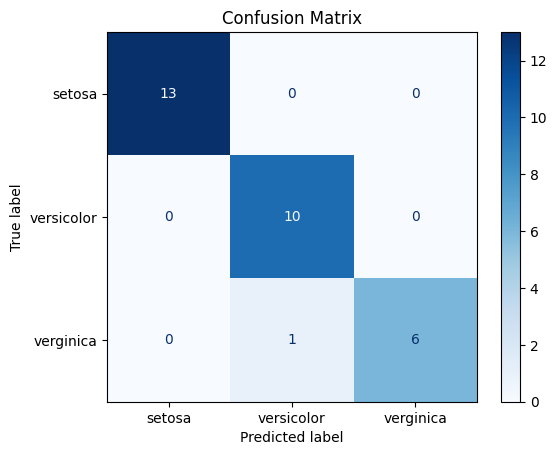


=== Fold 3 ===
TRAIN SAMPLE SIZE: 120
TEST SAMPLE SIZE: 30
Predicted:  ['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'versicolor' 'versicolor' 'virginica'
 'virginica' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica']
Correct:    ['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica']
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      0.80      0.89        10
   virginica       0.80      1.00      0.89         8

    accuracy        

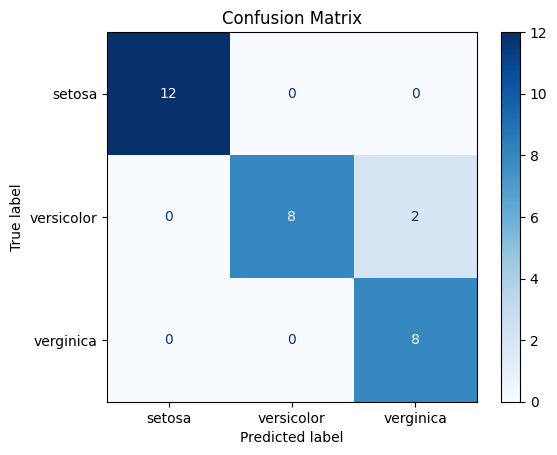


=== Fold 4 ===
TRAIN SAMPLE SIZE: 120
TEST SAMPLE SIZE: 30
Predicted:  ['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'virginica' 'virginica' 'versicolor' 'virginica' 'virginica'
 'versicolor' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica']
Correct:    ['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica']
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.82      0.90      0.86        10
   virginica       0.91      0.83      0.87     

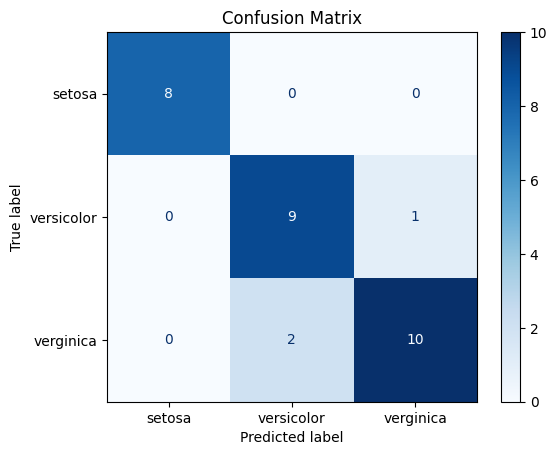


=== Fold 5 ===
TRAIN SAMPLE SIZE: 120
TEST SAMPLE SIZE: 30
Predicted:  ['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'virginica' 'virginica' 'versicolor' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica']
Correct:    ['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica']
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.92      1.00      0.96        11
   virginica       1.00      0.92     

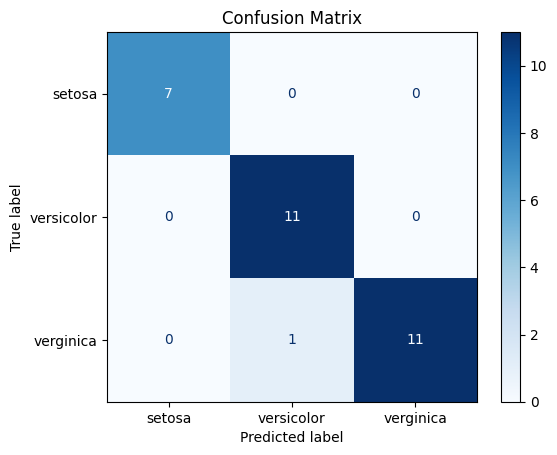

Average accuracy across folds: 0.9533333333333334
Average precision across folds: 0.9577676767676767
Average recall across folds: 0.9533333333333334
Average f1 across folds: 0.953277061103148


In [ ]:
# Cross-validation
# Deciding which hyperparameters to use

from sklearn.model_selection import KFold
import numpy as np

# Define features (X) and target (y)
X = df.drop(columns=['species']).values
y = df['species'].values

# Set up K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []

def draw_confusion_matrix(y_true, y_pred, class_names):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true, y_pred, display_labels=class_names, cmap='Blues'
    )
    disp.ax_.set_title("Confusion Matrix")
    plt.show()

# Run the folds
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    clf = DecisionTreeClassifier(max_depth=3, random_state=42)

    print(f"\n=== Fold {fold+1} ===")
    print("TRAIN SAMPLE SIZE:", len(train_index))
    print("TEST SAMPLE SIZE:", len(test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)

    print("Predicted: ", y_pred)
    print("Correct:   ", y_test)
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(classification_report(y_test, y_pred))

    draw_confusion_matrix(y_test, y_pred, class_names=['setosa', 'versicolor', 'verginica'])
    precision_scores.append(pre)
    recall_scores.append(rec)
    f1_scores.append(f1)
    accuracy_scores.append(acc)

print("Average accuracy across folds:", np.mean(accuracy_scores))
print("Average precision across folds:", np.mean(precision_scores))
print("Average recall across folds:", np.mean(recall_scores))
print("Average f1 across folds:", np.mean(f1_scores))
